In [ ]:
!pip uninstall --y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Uninstalling kaggle-1.5.8:
  Successfully uninstalled kaggle-1.5.8
     |████████████████████████████████| 1.5MB 4.9MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 2.2 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=1269b9aecd65ade5a1563e77e46391e64469394270959113f2a3a8281559a3b1
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!ls -lha kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 68 Sep 23 19:37 kaggle.json


In [ ]:
!kaggle competitions download -c logistic-classification-diabetes-knn

  0% 0.00/16.3k [00:00<?, ?B/s]
100% 16.3k/16.3k [00:00<00:00, 15.7MB/s]


In [ ]:
!unzip logistic-classification-diabetes-knn.zip

Archive:  logistic-classification-diabetes-knn.zip
  inflating: submission_form.csv     
  inflating: test_data.csv           
  inflating: train.csv               


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import random 
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('train.csv',header=None,skiprows=1)
test = pd.read_csv('test_data.csv',header=None,skiprows=1)
train = train.dropna()
train = train.drop(5,axis=1)
train = train.drop(4,axis=1)
X = train.iloc[:,1:-1]
y = train.iloc[:,-1:]

print(X.head(20))
print(X.describe())
print(X.info(verbose=True))

print(X.shape)
print(y.shape)

test_x = test.drop(5,axis=1)
test_x = test_x.drop(4,axis=1)
test_x = test_x.iloc[:,1:-1]

print(test_x.head(20))


           1         2         3         6         7         8
0  -0.294118  0.487437  0.180328  0.001490 -0.531170 -0.033333
1  -0.882353 -0.145729  0.081967 -0.207153 -0.766866 -0.666667
2  -0.058824  0.839196  0.049180 -0.305514 -0.492741 -0.633333
3  -0.882353 -0.105528  0.081967 -0.162444 -0.923997  0.000000
4   0.000000  0.376884 -0.344262  0.284650  0.887276 -0.600000
5  -0.411765  0.165829  0.213115 -0.236960 -0.894962 -0.700000
6  -0.647059 -0.216080 -0.180328 -0.076006 -0.854825 -0.833333
7   0.176471  0.155779  0.000000  0.052161 -0.952178 -0.733333
8  -0.764706  0.979899  0.147541 -0.090909 -0.931682  0.066667
9  -0.058824  0.256281  0.573770  0.000000 -0.868488  0.100000
10 -0.529412  0.105528  0.508197  0.120715 -0.903501 -0.700000
11  0.176471  0.688442  0.213115  0.132638 -0.608027 -0.566667
12  0.176471  0.396985  0.311475 -0.192250  0.163962  0.200000
13 -0.882353  0.899497 -0.016393 -0.102832 -0.726729  0.266667
14 -0.176471  0.005025  0.000000 -0.105812 -0.653288 -0

In [ ]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
classic = LabelEncoder()
y = classic.fit_transform(y.values)
print('diabetes labels :',np.unique(y))

diabetes labels : [0 1]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state=42, stratify=y, shuffle=True)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(425, 6)
(284, 6)
(425,)
(284,)


In [ ]:
#from sklearn.neighbors import KNeighborsClassifier
#knn = KNeighborsClassifier(n_neighbors=5,p=2)
#5개의 인접한 이웃, 거리측정기준 : 유클리드 
#knn.fit
#knn.fit(X_train,y_train)
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,100)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

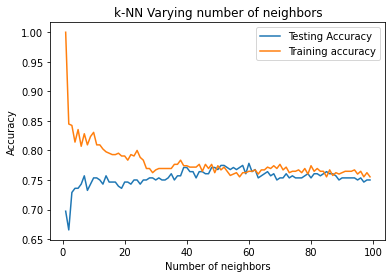

In [ ]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [ ]:
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test) #모델을 적용한 test data dml y값 예측치 
print('Misclassified training samples : %d' %(y_train!=y_train_pred).sum())
# 오분류 데이터 갯수 확인 
print('Misclassified test samples : %d' %(y_test!=y_test_pred).sum())

Misclassified training samples : 73
Misclassified test samples : 69


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_pred))

0.7570422535211268


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)

#True negative = 38
#False positive = 35
#True postive = 113
#Fasle negative = 27

array([[ 57,  41],
       [ 28, 158]])

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,57,41,98
1,28,158,186
All,85,199,284


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.58      0.62        98
           1       0.79      0.85      0.82       186

    accuracy                           0.76       284
   macro avg       0.73      0.72      0.72       284
weighted avg       0.75      0.76      0.75       284



In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

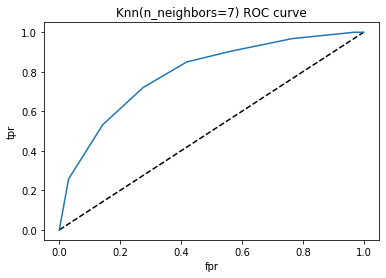

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()


In [ ]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.7910357691463683

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,100)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scori

In [ ]:
knn_cv.best_score_

0.7673259414643893

In [ ]:
knn_cv.best_params_

{'n_neighbors': 14}

In [ ]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='uniform')

In [ ]:
y_train_pred = knn.predict(X_train)
#y_test_pred = knn.predict(test_x)
y_test_pred = knn.predict(X_test) #모델을 적용한 test data dml y값 예측치 
print('Misclassified training samples : %d' %(y_train!=y_train_pred).sum())
# 오분류 데이터 갯수 확인 
print('Misclassified test samples : %d' %(y_test!=y_test_pred).sum())

Misclassified training samples : 86
Misclassified test samples : 69


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_pred))

0.7570422535211268


In [ ]:
y_pred = knn.predict(test_x)
test_x.shape

(50, 6)

In [ ]:
predict = np.array(y_pred[:50]).reshape(-1,1).astype('int')
id = np.array([i for i in range(len(predict))]).reshape(-1,1)
result = np.hstack([id,predict])
df = pd.DataFrame(result,columns=["ID","Label"])
df.to_csv("submission_form.csv",index=False,header=True)

In [ ]:
predict

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1]])

In [ ]:
!kaggle competitions submit -c logistic-classification-diabetes-knn -f submission_form.csv -m "14010974_이기택"

100% 249/249 [00:01<00:00, 146B/s]
Successfully submitted to logistic classification : diabetes KNN